# Tensorflow Binary Classification Exercises

Dataset:

- https://www.kaggle.com/datasets/saadpd/menwomen-classification


*Kaggle Connect to Google Colab*
- https://stackoverflow.com/questions/56816537/cant-find-kaggle-json-file-in-google-colab

### Import Libraries

- Pandas, NumPy, OS, random, matplotlib.pyplot, matplotlib.image, ZipFile
- TensorFlow
 - Sequential
 - Dense, Flatten, Conv2D, MaxPool2D
 - ImageDataGenerator
 - Adam

- SkLearn
 - Confusion Report and Classification Matrix

In [5]:
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
import tensorflow as tf

import zipfile

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix

### Download the dataset from Kaggle

- Optional but highly recommended

In [3]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"username","key":"api-key"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d saadpd/menwomen-classification

 97% 778M/806M [00:06<00:00, 165MB/s]
100% 806M/806M [00:06<00:00, 134MB/s]


### Unizp the data

In [6]:
uz = zipfile.ZipFile('menwomen-classification.zip')
uz.extractall()
uz.close()

### Check out the data

- Walk the directory tree and see how many images are in the set
- Get a random image
- Print the shape
- Print the image
- How many images are there in total?

In [21]:
for dirs, fols, files in os.walk('traindata'):
  print(f'{dirs}, {fols}, {len(files)}')

traindata, ['traindata'], 0
traindata/traindata, ['women', 'men'], 0
traindata/traindata/women, [], 1912
traindata/traindata/men, [], 1000


00001280.jpg
(5656, 7296, 3)


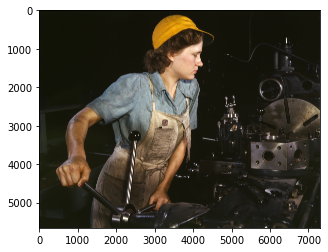

In [19]:
path = 'testdata/testdata/'
category = 'women'
target = path + category

image = random.choice(os.listdir(target))
print(image)

img = mpimage.imread(target + '/' + image)
print(img.shape)

plt.imshow(img)

### Normalize and Batch the Data

- Scale the data
- Target Size: (128,128)
- Class Mode: binary

In [20]:
train_dir = 'traindata/traindata/'
test_dir = 'testdata/testdata/'

# Scale
train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)


# Batch our data
train_data = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    class_mode='binary'
)

test_data = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    class_mode='binary'
)



Found 2891 images belonging to 2 classes.
Found 1330 images belonging to 2 classes.


### Create the Model

Hidden Layers
- 7 Hidden Layers
- 2x Conv2D, Conv2D, MaxPool2D Layers
- Flatten Layer
- Filters: 128
- Kernels: 3
- Activation: 'relu'

Compile
- Optimizer: Adam
- Loss: binary_crossentropy
- Metrics: Accuracy

In [22]:
model_1 = Sequential()

model_1.add(Conv2D(128, 3, activation='relu', input_shape=(128,128,3)))
model_1.add(Conv2D(128, 3, activation='relu'))
model_1.add(MaxPool2D())

model_1.add(Conv2D(128, 3, activation='relu'))
model_1.add(Conv2D(128, 3, activation='relu'))
model_1.add(MaxPool2D())

model_1.add(Flatten())

model_1.add(Dense(1, activation='sigmoid'))

model_1.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    train_data,
    validation_data=test_data,
    epochs=10
)

Epoch 1/10
91/91 [==============================] - 85s 786ms/step - loss: 0.6678 - accuracy: 0.6465 - val_loss: 0.6253 - val_accuracy: 0.6850
Epoch 2/10
91/91 [==============================] - 70s 770ms/step - loss: 0.6188 - accuracy: 0.6676 - val_loss: 0.6074 - val_accuracy: 0.6880
Epoch 3/10
91/91 [==============================] - 70s 768ms/step - loss: 0.6167 - accuracy: 0.6793 - val_loss: 0.6030 - val_accuracy: 0.6835
Epoch 4/10
91/91 [==============================] - 71s 777ms/step - loss: 0.5988 - accuracy: 0.6877 - val_loss: 0.5644 - val_accuracy: 0.6940
Epoch 5/10
91/91 [==============================] - 70s 773ms/step - loss: 0.5849 - accuracy: 0.6897 - val_loss: 0.5532 - val_accuracy: 0.7105
Epoch 6/10
91/91 [==============================] - 70s 770ms/step - loss: 0.5609 - accuracy: 0.7105 - val_loss: 0.5342 - val_accuracy: 0.7075
Epoch 7/10
91/91 [==============================] - 70s 769ms/step - loss: 0.5212 - accuracy: 0.7319 - val_loss: 0.5281 - val_accuracy: 0.7338

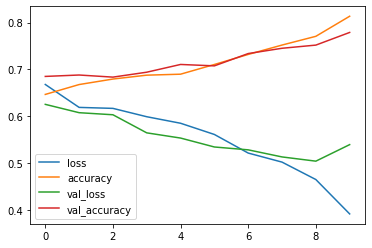

In [23]:
pd.DataFrame(history_1.history).plot()

### Evaluate and Predict on the Model

- Evaluate the performance of the model on the test_data
- Predict on a single image of man or woman
- Create a prediction function that saves to y_test and preds
- Run a confusion_matrix and classification_report between y_test and preds

In [24]:
model_1.evaluate(test_data)

42/42 [==============================] - 21s 498ms/step - loss: 0.5392 - accuracy: 0.7789


[0.5392072200775146, 0.7789473533630371]

00001114.jpg
[[1]]


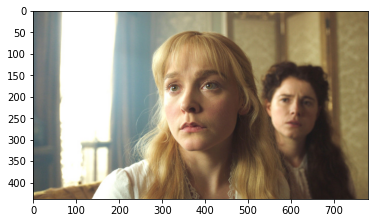

In [43]:
path = 'testdata/testdata/'
category = 'women'

target = path + category

image = random.choice(os.listdir(target))
print(image)

img = tf.io.read_file(target + '/' + image)
# print(img)
img = tf.io.decode_image(img)
# print(img)
img = tf.image.resize(img, [128,128])
# print(img)
img = img/255.
# print(img)

pred = (model_1.predict(tf.expand_dims(img, axis=0)) > 0.5) * 1
print(pred)

img_plot = mpimage.imread(target + '/' + image)
plt.imshow(img_plot)

In [33]:
test_data.class_indices

{'men': 0, 'women': 1}

In [46]:
y_test = []
preds = []

def predictor(path, image):
  target = path + '/' + image

  print(target)
  img = tf.io.read_file(target)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, [128,128])
  img = img/255.

  pred = (model_1.predict(tf.expand_dims(img, axis=0)) > 0.5) * 1
  preds.append(pred[0][0])

  if 'women' in path:
    y_test.append(1)
  else:
    y_test.append(0)

In [52]:
for dirs, fols, files in os.walk('testdata/testdata'):
  if len(fols) < 1:
    for file in files:
      predictor(dirs, file)

testdata/testdata/women/00000976.jpg
testdata/testdata/women/00000928.jpg
testdata/testdata/women/00000164.jpg
testdata/testdata/women/00001254.jpg
testdata/testdata/women/00001094.jpeg
testdata/testdata/women/00001008.jpg
testdata/testdata/women/00001100.jpg
testdata/testdata/women/00001073.jpeg
testdata/testdata/women/00000206.jpg
testdata/testdata/women/00000956.jpg
testdata/testdata/women/00001248.jpg
testdata/testdata/women/00001165.jpg
testdata/testdata/women/00000266.jpg
testdata/testdata/women/00000969.jpeg
testdata/testdata/women/00000549.jpg
testdata/testdata/women/00000290.jpg
testdata/testdata/women/00001096.jpg
testdata/testdata/women/00000879.jpg
testdata/testdata/women/00000348.jpg
testdata/testdata/women/00000268.jpg
testdata/testdata/women/00000220.jpg
testdata/testdata/women/00001083.jpg
testdata/testdata/women/00000457.jpg
testdata/testdata/women/00001329.jpg
testdata/testdata/women/00001123.jpg
testdata/testdata/women/00001125.jpg
testdata/testdata/women/00000108.jp

In [51]:
!find 'testdata/testdata/men' -name '*.gif' 

In [53]:
set(y_test)

{0, 1}

In [55]:
y_test.count(1)

955

In [56]:
set(preds)

{0, 1}

In [58]:
preds.count(1)

1187

In [59]:
print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[153 265]
 [ 33 922]]
              precision    recall  f1-score   support

           0       0.82      0.37      0.51       418
           1       0.78      0.97      0.86       955

    accuracy                           0.78      1373
   macro avg       0.80      0.67      0.68      1373
weighted avg       0.79      0.78      0.75      1373

